In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int64         
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 33.1+ MB


In [5]:
df.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [6]:
df.shape

(541909, 8)

In [7]:
df['Description'].isna().sum()

1454

In [8]:
# Checking the percentage of the null values in description to know if we can drop it
(df['Description'].isna().sum()/ df.shape[0]) * 100

0.2683107311375157

In [9]:
df.dropna(inplace = True)

In [10]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df.shape

(540455, 8)

In [12]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [13]:
#checking quantity less than 0
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [14]:
# Since quantity can never be less than 0 we need to remove them
df = df[~df['Quantity'] < 0]

In [15]:
df.shape

(530693, 8)

## Total Revenue Generated by Each country

In [16]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [18]:
df.groupby('Country').agg({'Revenue': 'sum'}).sort_values(by = 'Revenue', ascending = False).head()

,Revenue
Country,
United Kingdom,9003097.964
Netherlands,285446.340
EIRE,283453.960
Germany,228867.140
France,209715.110


## Top 10 Best-selling products based on total Quantity sold

In [19]:
df.groupby('Description').agg({'Quantity': 'sum'}).sort_values(by = 'Quantity', ascending = False).head(10)

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
JUMBO BAG RED RETROSPOT,48478
WHITE HANGING HEART T-LIGHT HOLDER,37895
POPCORN HOLDER,36761
ASSORTED COLOUR BIRD ORNAMENT,36461
PACK OF 72 RETROSPOT CAKE CASES,36419
RABBIT NIGHT LIGHT,30788


## Average Order Value (AOV) for each customer
<p>Total Revenue divided by Number of Transactions</p>

In [20]:
# Find the total revenue for Each customer
customer_rev = df.groupby('CustomerID')['Revenue'].sum().reset_index() #reset_index sets a new index and takes the customerID as part of the data
customer_rev.head()

,CustomerID,Revenue
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [21]:
# Find the Total transaction for each customer which each invoice is one transaction
customer_inv = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
customer_inv.head()

,CustomerID,InvoiceNo
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [22]:
# calculating the AOV
# First merging the two data into one data frame, then calculate the AOV
AOV_df = pd.merge(customer_rev, customer_inv, how = 'left', on = 'CustomerID')
AOV_df['AOV'] = (customer_rev['Revenue']/ customer_inv['InvoiceNo']).round(2)
AOV_df

,CustomerID,Revenue,InvoiceNo,AOV
0,12346,77183.60,1,77183.60
1,12347,4310.00,7,615.71
2,12348,1797.24,4,449.31
3,12349,1757.55,1,1757.55
4,12350,334.40,1,334.40
...,...,...,...,...
4334,18280,180.60,1,180.60
4335,18281,80.82,1,80.82
4336,18282,178.05,2,89.02
4337,18283,2094.88,16,130.93


## Monthly sales Trends Over the year

In [23]:
# First create the month column by extracting the month data from the Invoice Date
df['Month'] = df['InvoiceDate'].dt.month_name() 

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,December


In [25]:
df.groupby('Month')['Revenue'].sum().sort_values(ascending = False)

Month
November     1509496.330
December     1462538.820
October      1154979.300
September    1058590.172
May           770536.020
June          761739.900
August        737014.260
July          719221.191
March         717639.360
January       691364.560
April         537808.621
February      523631.890
Name: Revenue, dtype: float64

<Axes: xlabel='Month'>

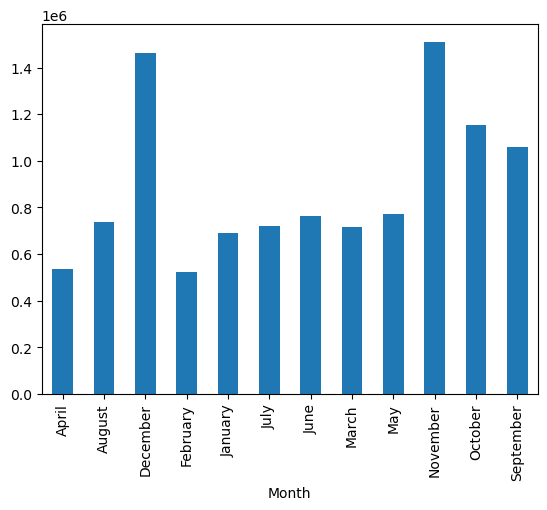

In [26]:
df.groupby('Month')['Revenue'].sum().plot(kind = 'bar')

## Who are the top 5 most profitable customers based on total revenue contribution?

In [37]:
customer_rev['Contribution'] = ((customer_rev['Revenue']/ (df['Revenue'].sum())).sort_values(ascending = False) * 100).round(4)
customer_rev.head()

,CustomerID,Revenue,Contribution
0,12346,77183.60,0.7251
1,12347,4310.00,0.0405
2,12348,1797.24,0.0169
3,12349,1757.55,0.0165
4,12350,334.40,0.0031


## How are sales distributed across various product categories?

In [28]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'Month'],
      dtype='object')

In [29]:
df.groupby('Description')['Revenue'].sum()

Description
 4 PURPLE FLOCK DINNER CANDLES     290.80
 50'S CHRISTMAS GIFT BAG LARGE    2343.63
 DOLLY GIRL BEAKER                2891.25
 I LOVE LONDON MINI BACKPACK      1628.17
 I LOVE LONDON MINI RUCKSACK         4.15
                                   ...   
wrongly coded 20713                  0.00
wrongly coded 23343                  0.00
wrongly marked                       0.00
wrongly marked 23343                 0.00
wrongly sold (22719) barcode         0.00
Name: Revenue, Length: 4077, dtype: float64

## On which days of the week are the highest numbers of invoices generated?

In [30]:
df['InvoiceDate'].dt.day_name().value_counts().idxmax()

'Thursday'

## What is the average quantity of items ordered per invoice?

In [31]:
df.groupby('InvoiceNo').agg({'Quantity': 'mean'}).sort_values(by = 'Quantity', ascending = False)

,Quantity
InvoiceNo,
581483,80995.0
541431,74215.0
578841,12540.0
554868,4300.0
556231,4000.0
...,...
580699,1.0
540939,1.0
540945,1.0


## During which hours of the day do most customer purchases occur?

In [32]:
df['InvoiceDate'].dt.hour.value_counts().head(1)

InvoiceDate
12    77149
Name: count, dtype: int64

## What significant seasonal trends can be observed in the sales data?

<Axes: xlabel='Days'>

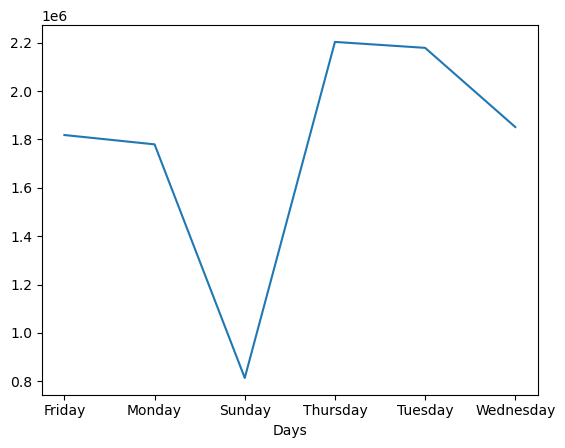

In [33]:
df['Days'] = df['InvoiceDate'].dt.day_name()
df.groupby('Days')['Revenue'].sum().plot(kind = 'line')